In [2]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np
import pandas as pd
    
from sympy.geometry import Point, Line, Triangle
from sympy.vector import CoordSys3D, vector


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'geopla'
titulo = '25 - Geometría Plana'
curso = '1BC'


x,y = symbols('x, y', real=True)


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [3]:
def Linea(expr) :
    eq = eval(str(parse_latex(expr)))
    p1 = Point(0,nsimplify(solve(Eq(eq.args[0].subs(x,0),eq.args[1].subs(x,0)),y)[0]))
    p2 = Point(1,nsimplify(solve(Eq(eq.args[0].subs(x,1),eq.args[1].subs(x,1)),y)[0]))
    
    return Line(p1,p2)
    #return [p1,p2]

In [4]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

display(N.base_vectors())
v = [1,2,0]
base = [i,j,k]
u=(np.array(v)*np.array(base)).sum()
type(u)
u.components
u


In [5]:
w=i+2*j
print(latex(w))
w

\mathbf{\hat{i}_{N}} + (2)\mathbf{\hat{j}_{N}}


In [6]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()


In [7]:
# Página 50 ejercicio 1

texto_ejercicio = r"""Hallar las ecuaciones paramétricas, continua, general y explícita de la recta r 
determinada por:"""

n_ejercicio = 'p050e01'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [[(-1,3),(2,5)],]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(r"A{} \ y \overrightarrow".format(s[0])+"{u}="+r"{}".format(s[1]))
    enunciado = str(s)
    sol1, sol2 =Line(Point(s[0]),Point(s[0])+Point(s[1])).equation(), Line(Point(s[0]),Point(s[0])+Point(s[1])).arbitrary_point()
    solucion.append(latex(Eq(sol1,0)) + " y " + latex(Eq(sol2,(x,y))))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Hallar las ecuaciones paramétricas, continua, general y explícita de la recta r 
determinada por:**

['- 5 x + 2 y - 11 = 0 y Point2D(2*t - 1, 5*t + 3) = \\left ( x, \\quad y\\right )']

In [31]:
# Página 50 ejercicio 2

texto_ejercicio = r"""Halla un vector direccional y un vector perpendicular a la recta:"""

n_ejercicio = 'p050e02'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

enunciado_latex = [
                    r'3x+2y+8=0',
                    r'\frac{x-1}{3}=\frac{2-y}{1}',
                       r'y=5'
                      ]

enunciado, solucion = [],[]

for i, s in enumerate(enunciado_latex) : 
    enunciado = str(parse_latex(s))
    so=Linea(s).direction
    solucion.append((so,so.orthogonal_direction))
    display(md("$"+ s +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Halla un vector direccional y un vector perpendicular a la recta:**

$3x+2y+8=0 \rightarrow \left ( Point2D(1, -3/2), \quad Point2D(3/2, 1)\right )$

$\frac{x-1}{3}=\frac{2-y}{1} \rightarrow \left ( Point2D(1, -1/3), \quad Point2D(1/3, 1)\right )$

$y=5 \rightarrow \left ( Point2D(1, 0), \quad Point2D(0, 1)\right )$

In [9]:
# Página 50 ejercicio 4

texto_ejercicio = r"""Comprobar que es isósceles el triángulo de vértices:"""

n_ejercicio = 'p050e04'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(2,1),(1,2),(3,3)],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    pa, pb, pc = [Point(k) for k in s]
    tr = Triangle(pa,pb,pc)
    solucion.append(tr.is_isosceles())
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Comprobar que es isósceles el triángulo de vértices:**

$A=(2, 1), \ B=(1, 2),\  y \ C=(3, 3) \rightarrow \mathrm{True}$

In [10]:
# Página 50 ejercicio 5

texto_ejercicio = r"""Determinar m con la condición de que disten 1 unidad los siguiente puntos"""

n_ejercicio = 'p050e05'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(0,m),(1,2)],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+"\  y \ B="+str(s[1])+"")
    enunciado = str(s)
    pa, pb = [Point(k) for k in s]
    solucion.append(solve(Eq(pa.distance(pb),1),m))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Determinar m con la condición de que disten 1 unidad los siguiente puntos**

$A=(0, m)\  y \ B=(1, 2) \rightarrow \left [ 2\right ]$

In [11]:
# Página 50 ejercicio 6

texto_ejercicio = r"""Determinar el ángulo formado por las rectas:"""

n_ejercicio = 'p050e05'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [r'4x-y-1=0',r'2x+7y-6=0'],
                    [r'-x+2y+1=0',r'3x+y+5=0'],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("r\equiv"+str(s[0])+"\  y \ s\equiv"+str(s[1])+"")
    enunciado = str(s)

    solucion.append(float(deg(Linea(s[0]).angle_between(Linea(s[1])))))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Determinar el ángulo formado por las rectas:**

$r\equiv4x-y-1=0\  y \ s\equiv2x+7y-6=0 \rightarrow 91.90915243299638$

$r\equiv-x+2y+1=0\  y \ s\equiv3x+y+5=0 \rightarrow 98.13010235415598$

In [72]:
# Página 50 ejercicio 7 y 8

texto_ejercicio = r"""Hallar la recta r que:"""

n_ejercicio = 'p050e07,8y28'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(1,-2),r'y=0', 120],
                    [(2,3),r'2x+y-1=0', 45],
                    [(1,2),r'2x+y-1=0',45]
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("Pasa \ por \ A"+str(s[0])+"\  y \ forma \ " +str(s[2])+ " \ grados \  con \ s\equiv "+str(s[1]))
    enunciado = str(s)
    Point(s[0])
    A, B =Linea(s[1]).coefficients[:2]
    solucion.append(latex(Eq(simplify(Line(Point(s[0]),Point(s[0])+Point(-B,A).rotate(rad(s[2]))).equation()),0)))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

# df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Hallar la recta r que:**

$Pasa \ por \ A(1, -2)\  y \ forma \ 120 \ grados \  con \ s\equiv y=0 \rightarrow \frac{\sqrt{3} x}{2} + \frac{y}{2} - \frac{\sqrt{3}}{2} + 1 = 0$

$Pasa \ por \ A(2, 3)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{\sqrt{2} \left(- x - 3 y + 11\right)}{2} = 0$

$Pasa \ por \ A(1, 2)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{\sqrt{2} \left(- x - 3 y + 7\right)}{2} = 0$

**Hallar la recta r que:**

$Pasa \ por \ A(2, 3)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{x}{3} + y - \frac{11}{3} = 0$

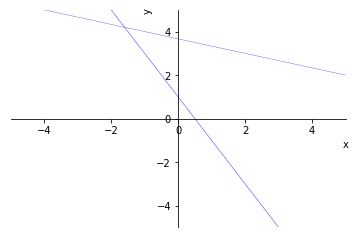

$Pasa \ por \ A(1, 2)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{x}{3} + y - \frac{7}{3} = 0$

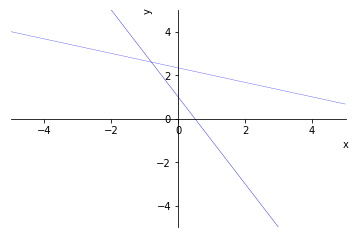

$Pasa \ por \ A(1, -2)\  y \ forma \ 120 \ grados \  con \ s\equiv y=0 \rightarrow \sqrt{3} x + y - \sqrt{3} + 2 = 0$

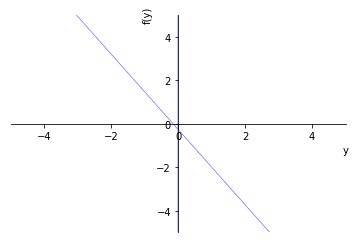

In [131]:
# Página 50 ejercicio 7 y 8

texto_ejercicio = r"""Hallar la recta r que:"""

n_ejercicio = 'p050e07,8y28'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(2,3),r'2x+y-1=0', 45],
                    [(1,2),r'2x+y-1=0',45],
                    [(1,-2),r'y=0', 120],
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("Pasa \ por \ A"+str(s[0])+"\  y \ forma \ " +str(s[2])+ " \ grados \  con \ s\equiv "+str(s[1]))
    enunciado = str(s)
    r, p, an = Linea(s[1]), Point(s[0]), rad(s[2])
    u = r.direction
    v = Point(1,x)
    #display(r,p,an)
    #u.dot(v), u.distance((0,0)), r.equation()
    m = solve(abs(cos(an))-abs(u.dot(v))/(u.distance((0,0))*v.distance((0,0))))[0]

    eq = Eq(Line(s[0],slope=m).equation(),0)
    solucion.append(latex(eq))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    p1.extend(p2)
    p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


In [18]:
# Página 51 ejercicio 20

texto_ejercicio = r"""Calcula el vértice C de un triángulo, sabiendo que:"""

n_ejercicio = 'p051e20'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(4,0),(6,2),r'3x+y-1=0'],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(" A"+str(s[0])+"\  , \ B=" +str(s[1])+ " \ y \  C \in r\equiv "+str(s[2]))
    enunciado = str(s)
    r = Linea(s[2])

    P = Point(x,y)

    r.distance(Point(s[0]))

    sol = solve([P.distance(s[0])-P.distance(s[1]),r.equation()])
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Calcula el vértice C de un triángulo, sabiendo quu:**

$ A(4, 0)\  , \ B=(6, 2) \ y \  C \in r\equiv 3x+y-1=0 \rightarrow \left [ \left \{ x : - \frac{5}{2}, \quad y : \frac{17}{2}\right \}\right ]$

In [30]:
# Página 51 ejercicio 21

texto_ejercicio = r"""Determinar el punto simétrico al punto y respecto de la recta siguientes:"""

n_ejercicio = 'p051e21'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(2,5),r'5x+y=2'],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(" A"+str(s[0])+" \ y \   r\equiv "+str(s[1]))
    enunciado = str(s)
    sol=[]
    p = Point(s[0])
    r1 = Linea(s[1])
    sol.append(r1.perpendicular_line(p).equation())
    dict = solve([r1.equation(),r1.perpendicular_line(p).equation()])
    M = Point(list(dict.values()))
    sol.append(M)
    
    sol.append(p.rotate(pi, M))
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Determinar el punto simétrico al punto y respecto de la recta siguientes:**

$ A(2, 5) \ y \   r\equiv 5x+y=2 \rightarrow \left [ - x + 5 y - 23, \quad Point2D(-1/2, 9/2), \quad Point2D(-3, 4)\right ]$

In [30]:
# Página 51 ejercicio 23

texto_ejercicio = r"""Determinar el punto simétrico al punto y respecto de la recta siguientes:"""

n_ejercicio = 'p051e23'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  r'4x-3y=0',                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("r\equiv "+str(s))
    enunciado = str(s)
    P = Point(x,y)
    r1 = Linea(s)
    #r1.slope, Eq(radsimp(cancel(r1.distance(P)-1)),0)

    
    
    sol=Eq(factor(expand(r1.distance(P)))-1,0)
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Determinar el punto simétrico al punto y respecto de la recta siguientes:**

$ A(2, 5) \ y \   r\equiv 5x+y=2 \rightarrow \left [ - x + 5 y - 23, \quad Point2D(-1/2, 9/2), \quad Point2D(-3, 4)\right ]$

Hallar la ecuación de la recta paralela a r 4x-3y=0 que dista una unidad

In [41]:
s = r'4x-3y=0'

P = Point(x,y)
r1 = Linea(s)
#r1.slope, Eq(radsimp(cancel(r1.distance(P)-1)),0)

factor(expand(r1.distance(P)))-1
#nsimplify(r1.distance(P)-1)


#float(r1.distance(Point(2,2)))


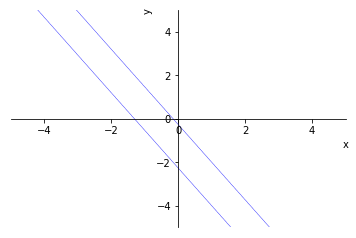

In [126]:
%matplotlib inline
p1 = plot_implicit(Linea(r'\frac{\sqrt{3} x}{2} + \frac{y}{2} - \frac{\sqrt{3}}{2} + 1 = 0').equation(),show=False)
p2 = plot_implicit(Linea(r'\frac{\sqrt{3} x}{2} + \frac{y}{2} - \frac{\sqrt{3}}{2} + 2 = 0').equation(),show=False)
p1.extend(p2)
p1.show()
Linea(r'3x+2y+8=0').direction.orthogonal_direction

In [120]:
plot_implicit?

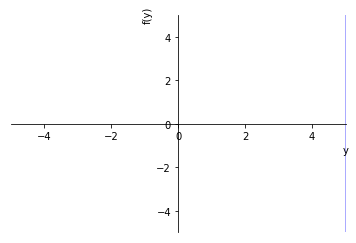

In [15]:
#expr = r'3x+2y+8=0'
expr = r'y=5'
%matplotlib inline
plot_implicit(Linea(expr).equation())
Linea(expr).direction

In [20]:
A, B, C = Point(2,-1), Point(-5,1), Point(0,3)
t = Triangle(A,B,C)
altura = t.altitudes[C].length
base = A.distance(B)
area = base*altura/2

altura, base, area

In [19]:
p = Point(solve([(3-x)**2+(4-y)**2-36, 4*x-3*y],x,y)[0])
p.midpoint(Point(3,4))
nsimplify(Line(p.midpoint(Point(3,4)), slope=-3/4).equation())

#solve([(-3/5-x)**2+(-4/5-y)**2-9, nsimplify(Line(p.midpoint(Point(3,4)), slope=-3/4).equation())],x,y)
p, p.midpoint(Point(3,4)), nsimplify(Line(p.midpoint(Point(3,4)), slope=-3/4).equation())

solve([nsimplify(Line(p.midpoint(Point(3,4)), slope=-3/4).equation()), (x-1.2)**2+(y-1.6)**2-9 ])



In [32]:
Line(Point(1,2),slope=solve(sqrt(2)/2-(-1+2*x)/(sqrt(1+x**2)*sqrt(5)))[0]).equation()

Ejercicio de recta con ángulo


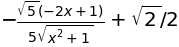

In [110]:
#datos = [(1,2),r'2x+y-1=0',45]
datos = [(1,-2),r'y=0', 60]
datos = [(1,2),r'2x+y-1=0',45]

r, p, an = Linea(datos[1]), Point(datos[0]), rad(datos[2])

u = r.direction
v = Point(1,x)

display(r, p, an, u, v, u.dot(v), u.distance((0,0)),v.distance((0,0)), cos(an)-(u.dot(v))/(u.distance((0,0))*v.distance((0,0))),solve(abs(cos(an))-abs(u.dot(v))/(u.distance((0,0))*v.distance((0,0)))))

u.dot(v), u.distance((0,0)), r.equation()
eq = Eq(Line(datos[0],slope=solve(abs(cos(an))-abs(u.dot(v))/(u.distance((0,0))*v.distance((0,0))))[0]).equation(),0)
eq

In [62]:
Point(2,1).distance(Point(0,0))

In [12]:
Linea(r'5x+y-1')

In [16]:
df_ejercicios.to_csv('ejercicios25.csv', index = False)

In [17]:
df_ejercicios = pd.read_csv('ejercicios25.csv', index_col= None)

In [1]:
df_ejercicios

NameError: name 'df_ejercicios' is not defined